In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('houses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22754 entries, 0 to 22753
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       22754 non-null  int64 
 1   City             22754 non-null  object
 2   Price            22754 non-null  int64 
 3   Area             22754 non-null  int64 
 4   Location         22754 non-null  object
 5   No. of Bedrooms  22754 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.0+ MB


In [14]:
df.head()

,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3


In [15]:
df.groupby("City")["Price"].mean()

City
Bangalore    1.080709e+07
Chennai      8.933745e+06
Delhi        1.492276e+07
Hyderabad    1.014127e+07
Kolkata      7.908581e+06
Mumbai       1.348523e+07
Name: Price, dtype: float64

In [22]:
df.describe()


,Unnamed: 0,Price,Area,No. of Bedrooms
count,22754.000000,2.275400e+04,22754.000000,22754.000000
mean,3239.404105,1.018985e+07,1323.202997,2.436099
std,2053.482779,1.544475e+07,737.555683,0.777309
min,0.000000,2.000000e+06,216.000000,1.000000
25%,1382.250000,4.114000e+06,912.000000,2.000000
50%,3205.000000,6.488000e+06,1160.000000,2.000000
75%,4881.000000,1.050000e+07,1506.000000,3.000000
max,7682.000000,7.044000e+08,10000.000000,9.000000


In [24]:
df.notnull()

,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
22749,True,True,True,True,True,True
22750,True,True,True,True,True,True
22751,True,True,True,True,True,True
22752,True,True,True,True,True,True


In [26]:
df.isnull().sum()

Unnamed: 0         0
City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [27]:
df.columns

Index(['Unnamed: 0', 'City', 'Price', 'Area', 'Location', 'No. of Bedrooms'], dtype='object')

# Visualizations

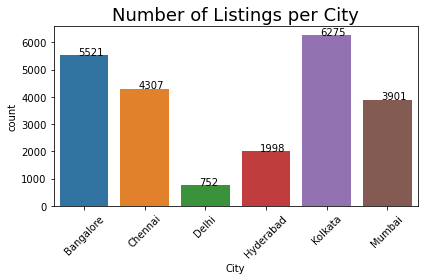

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='City')
ax.set_title('Number of Listings per City', fontsize=18)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 1), fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

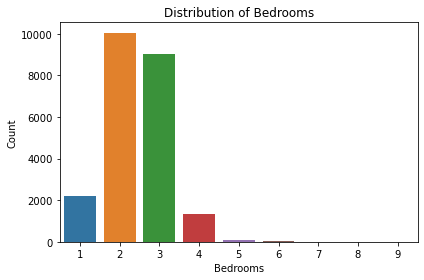

In [43]:
sns.countplot(x=df["No. of Bedrooms"])
plt.title("Distribution of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


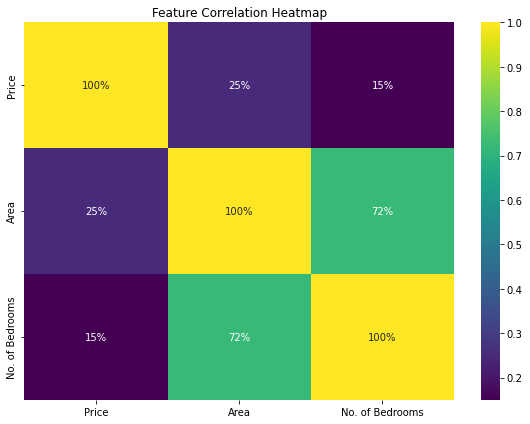

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns
numeric_cols = ["Price", "Area", "No. of Bedrooms"]
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".0%", cmap="viridis")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

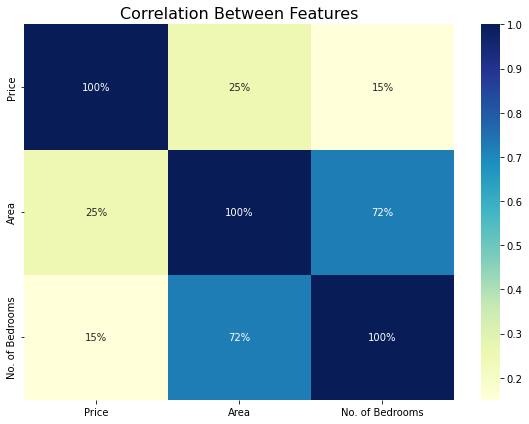

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.title('Correlation Between Features', fontsize=16)

numeric_features = ["Price", "Area", "No. of Bedrooms"]
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".0%", cmap="YlGnBu", ax=ax)

plt.tight_layout()
plt.show()


# Training Testing Splitting

In [28]:
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

In [29]:
X

,Unnamed: 0,Area,No. of Bedrooms,Location_200 Feet Radial Road,Location_47 Sector 22 Road,Location_59 Sector 22 Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,...,Location_tambaram west,Location_thakur village kandivali east,Location_vasant vihar thane west,Location_vile parle west,Location_west venkatapuram,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,3340.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1045.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1179.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1675.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1670.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22749,7678,2250.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22750,7679,2250.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22751,7680,2200.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22752,7681,1800.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y

0        30000000.0
1         7888000.0
2         4866000.0
3         8358000.0
4         6845000.0
            ...    
22749     8000000.0
22750     7700000.0
22751     7500000.0
22752     8000000.0
22753     7500000.0
Name: Price, Length: 22754, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(6827,)

In [36]:
X_train.shape

(18203, 1404)

In [37]:
X_test.shape

(4551, 1404)

In [38]:
y_train.shape

(18203,)

In [39]:
y_test.shape

(4551,)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)
print('Training Feature Size :- ', X_train.shape )
print('Training Label Size :- ', y_train.shape )
print('Testing Feature Size :- ', X_test.shape )
print('Testing Label Size :- ', y_test.shape )

Training Feature Size :-  (18203, 1404)
Training Label Size :-  (18203,)
Testing Feature Size :-  (4551, 1404)
Testing Label Size :-  (4551,)


# using LogisticRegression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Convert continuous price into categories
df["PriceCategory"] = pd.cut(df["Price"], bins=[0, 8000000, 12000000, np.inf], labels=["Low", "Mid", "High"])


In [63]:
X = df[["Area", "No. of Bedrooms"]]
y = df["PriceCategory"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Train model
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Accuracy Score: 0.6361239288068556
              precision    recall  f1-score   support

        High       0.56      0.15      0.24       921
         Low       0.64      0.97      0.77      2842
         Mid       0.00      0.00      0.00       788

    accuracy                           0.64      4551
   macro avg       0.40      0.37      0.34      4551
weighted avg       0.51      0.64      0.53      4551



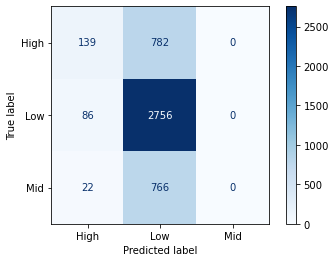

In [65]:

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")



In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X = df[["Area", "No. of Bedrooms"]] 
y = df["Price"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" R² Score:", r2_score(y_test, y_pred))
print(" Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


 R² Score: 0.03865595088838025
 Mean Absolute Error: 6794587.74646803


# using xgboost


In [80]:
!pip install xgboost

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


bins = [0, 8000000, 12000000, float('inf')]
labels = ['Low', 'Mid', 'High']
df["PriceCategory"] = pd.cut(df["Price"], bins=bins, labels=labels)

# Create features (Area, Bedrooms + City encoding)
X = pd.concat([
    df[["Area", "No. of Bedrooms"]],
    pd.get_dummies(df["City"], drop_first=True)
], axis=1)

le = LabelEncoder()
y = le.fit_transform(df["PriceCategory"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\n Classification Report:\n", classification_report(
    le.inverse_transform(y_test),
    le.inverse_transform(y_pred),
    zero_division=0
))

Accuracy Score: 68.27 %

 Classification Report:
               precision    recall  f1-score   support

        High       0.55      0.42      0.48       921
         Low       0.73      0.90      0.81      2842
         Mid       0.47      0.19      0.27       788

    accuracy                           0.68      4551
   macro avg       0.58      0.50      0.52      4551
weighted avg       0.65      0.68      0.65      4551

